In [1]:
import pandas as np
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
%matplotlib inline


In [2]:
stocks=input('Enter the code of the stock :- ')
data=yf.download(stocks,"2018-08-20","2023-08-20",auto_adjust=True)
data.head()

Enter the code of the stock :- GC=F
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2018-08-20,1184.800049,1190.000000,1184.400024,1186.800049,68
2018-08-21,1189.800049,1192.599976,1189.800049,1192.599976,22
2018-08-22,1194.699951,1196.300049,1194.699951,1196.300049,17
2018-08-23,1189.300049,1190.300049,1184.900024,1187.000000,95
2018-08-24,1185.300049,1208.000000,1185.300049,1206.300049,12


In [3]:
data.shape

(1258, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2018-08-20 to 2023-08-18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [5]:
data.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,1686.790780,1695.010176,1678.757632,1686.961763,4970.165342
std,236.590442,238.720130,234.453730,236.567432,27316.372324
min,1181.699951,1189.099976,1180.000000,1182.300049,0.000000
25%,1504.825043,1509.525024,1495.724976,1504.599976,57.000000
50%,1770.600037,1780.099976,1764.300049,1771.099976,210.500000
75%,1864.649963,1868.649963,1853.825012,1863.799988,617.250000
max,2053.600098,2072.000000,2040.000000,2051.500000,346362.000000


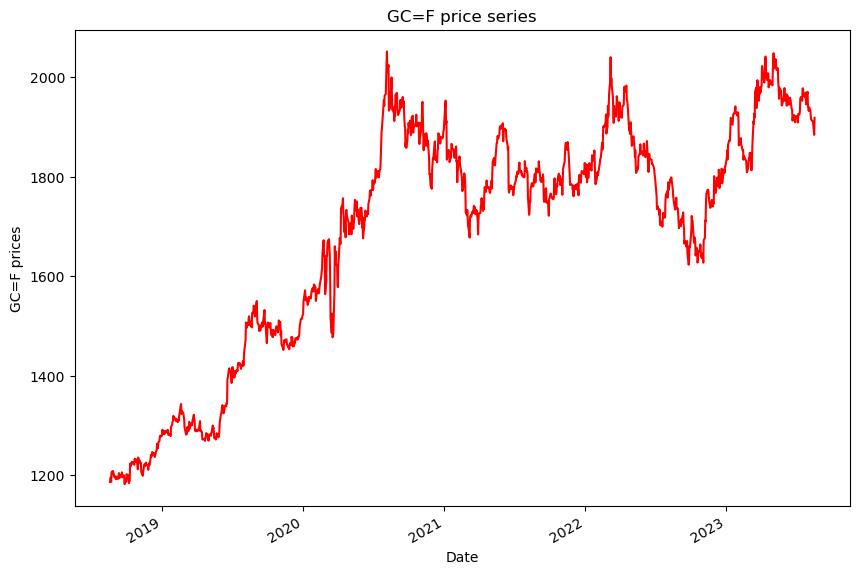

In [6]:
data.Close.plot(figsize=(10,7),color='r')
plt.ylabel("{} prices".format(stocks))
plt.title("{} price series".format(stocks))
plt.show()

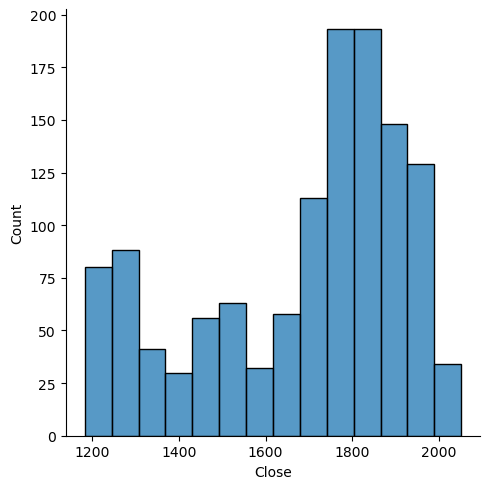

In [7]:
sns.displot(data["Close"])

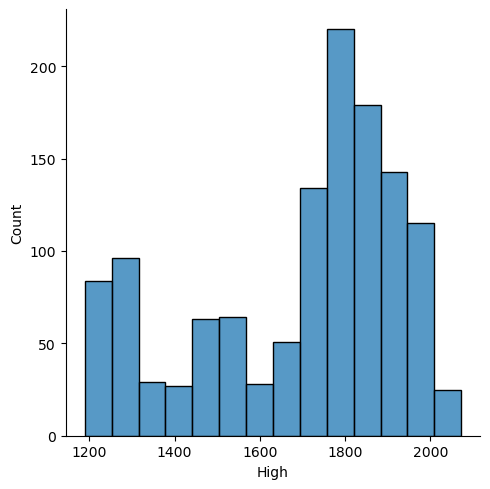

In [8]:
sns.displot(data["High"])

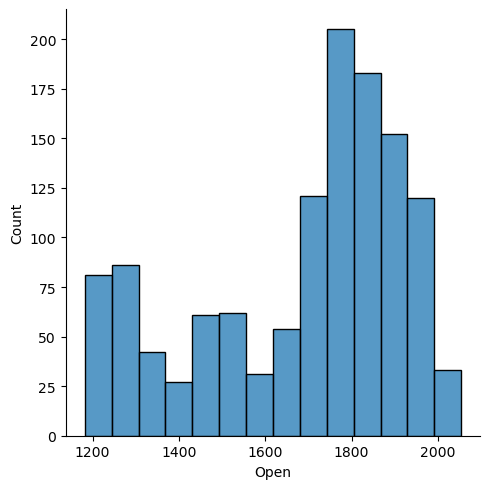

In [9]:
sns.displot(data["Open"])

In [10]:
# lets first try linear regression

from sklearn.model_selection import train_test_split

In [11]:
x=data.drop("Close",axis=1)
y=data['Close']


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
y_test.shape

(1006, 4)
(252, 4)
(1006,)


(252,)

In [14]:
# lets first try linear regression model

from sklearn.linear_model import LinearRegression

In [15]:
model_1=LinearRegression()
model_1.fit(x_train,y_train)
r=model_1.predict(x_test)

In [16]:
r

array([1207.26395381, 2054.99558552, 1231.56998467, 1702.38032157,
       1275.80885941, 1195.31698118, 1463.49571055, 1957.78044466,
       1583.02471575, 1805.07569153, 1867.890983  , 1783.88405811,
       1952.26756971, 1744.7756483 , 1814.67881226, 1908.3482518 ,
       1855.89464521, 1966.49610248, 1259.22420487, 1968.26204788,
       1896.1063531 , 1335.69365787, 1850.78512632, 2004.49956315,
       1972.94540427, 1414.39574427, 1824.07496657, 2054.64566075,
       1713.15163279, 1728.8120187 , 1292.26080809, 1813.83835361,
       1809.2967187 , 1235.12628305, 1795.43075265, 1785.30257317,
       1854.11048041, 2015.05759406, 1815.42021547, 1463.06876812,
       1499.16769859, 1991.33180215, 1713.08079523, 1988.95005911,
       1895.53538648, 1192.26937533, 1934.10312713, 1855.71472981,
       1293.74591955, 1963.50094775, 1755.55344818, 1463.32708221,
       1910.40267851, 1227.72534178, 1709.91479579, 1475.35269933,
       1805.41962513, 1929.68939235, 1230.34065422, 1293.90450

In [17]:
y_test

Date
2018-08-27    1209.000000
2020-08-06    2051.500000
2018-11-01    1236.000000
2022-07-20    1699.500000
2019-05-17    1274.500000
                 ...     
2023-01-06    1864.199951
2018-10-03    1198.300049
2020-04-03    1633.699951
2018-11-19    1223.099976
2021-08-06    1760.000000
Name: Close, Length: 252, dtype: float64

In [18]:
from sklearn.metrics import mean_squared_error,r2_score

In [19]:
mean_squared_error(y_test,r)


34.78682675998061

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
model_2=RandomForestRegressor(max_leaf_nodes=300,random_state=0)
model_2.fit(x_train,y_train)
r2=model_2.predict(x_test)


In [22]:
mean_squared_error(y_test,r2)

66.35377810654664

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
model_3=DecisionTreeRegressor(random_state=0)
model_3.fit(x_train,y_train)
r3=model_3.predict(x_test)

In [25]:
mean_squared_error(y_test,r3) 

110.47566030582502

In [26]:
from sklearn.linear_model import Lasso ,Ridge

In [27]:
la=Lasso().fit(x_train,y_train)
ra=Ridge().fit(x_train,y_train)
r4=la.predict(x_test)
r5=ra.predict(x_test)

/Users/shahrukhkhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.949e+04, tolerance: 5.706e+03
  model = cd_fast.enet_coordinate_descent(


In [28]:
mean_squared_error(y_test,r4) 
 

37.81202061683657

In [29]:
mean_squared_error(y_test,r5) 

34.78676952206946

In [30]:
import joblib 
joblib.dump(model_1, 'model.pkl')
ridge_from_joblib=model=joblib.load('model.pkl')

In [31]:
from xgboost import XGBRegressor

model_4=XGBRegressor(n_estimators=450,learning_rate=0.05,random_state=0)

model_4.fit(x_train,y_train)
r6=model_4.predict(x_test)

In [32]:
mean_squared_error(y_test,r6) 

58.88613161675277

In [34]:
models=[model_1,model_2,model_3,model_4,la,ra]
predict=[r,r2,r3,r6,r4,r5]

In [ ]:
r5.shape

array([1207.25523477, 2031.58329974, 1225.06685992, 1703.19862385,
       1277.64619647, 1195.16523988, 1462.35277024, 1963.43573332,
       1578.67543085, 1800.85744428, 1868.27485376, 1785.1261278 ,
       1952.55027464, 1739.51797351, 1817.19350184, 1915.4467517 ,
       1860.1717024 , 1963.46278289, 1247.69933277, 1961.06993989,
       1894.35378037, 1329.98310912, 1855.86849696, 2000.39047823,
       1972.49252812, 1410.07107771, 1822.07033137, 2011.94386082,
       1709.36917431, 1729.19604332, 1297.39127642, 1809.97735726,
       1810.51318004, 1230.4204865 , 1797.47617889, 1780.73534427,
       1854.67056851, 2019.48090287, 1813.79325058, 1466.03434385,
       1499.97844537, 1988.23097762, 1710.40897376, 1991.24610041,
       1893.91463519, 1189.78855186, 1934.37485498, 1851.36139321,
       1290.03926826, 1952.3927886 , 1760.53765222, 1454.37639727,
       1914.02745045, 1228.67772543, 1710.1138991 , 1474.29806844,
       1802.74308379, 1933.72825563, 1227.20851256, 1296.82979

In [43]:
x_test

,Open,High,Low,Volume
Date,,,,
2018-08-27,1210.300049,1211.400024,1205.199951,154
2020-08-06,2045.500000,2063.000000,2040.000000,294
2018-11-01,1215.400024,1236.000000,1215.400024,14
2022-07-20,1707.099976,1708.500000,1699.500000,130
2019-05-17,1280.000000,1280.000000,1274.500000,1
...,...,...,...,...
2023-01-06,1838.400024,1868.199951,1835.300049,26
2018-10-03,1202.599976,1202.599976,1196.599976,76
2020-04-03,1624.500000,1636.000000,1619.800049,643


In [ ]:
#conlclusion

                   Open         High          Low  Volume        Close
Date                                                                  
2018-08-27  1210.300049  1211.400024  1205.199951     154  1207.263954
2020-08-06  2045.500000  2063.000000  2040.000000     294  2054.995586
2018-11-01  1215.400024  1236.000000  1215.400024      14  1231.569985
2022-07-20  1707.099976  1708.500000  1699.500000     130  1702.380322
2019-05-17  1280.000000  1280.000000  1274.500000       1  1275.808859
...                 ...          ...          ...     ...          ...
2023-01-06  1838.400024  1868.199951  1835.300049      26  1859.275303
2018-10-03  1202.599976  1202.599976  1196.599976      76  1197.973867
2020-04-03  1624.500000  1636.000000  1619.800049     643  1629.915059
2018-11-19  1223.099976  1223.099976  1223.099976       0  1223.425215
2021-08-06  1799.800049  1800.099976  1758.400024     859  1766.402155

[252 rows x 5 columns]


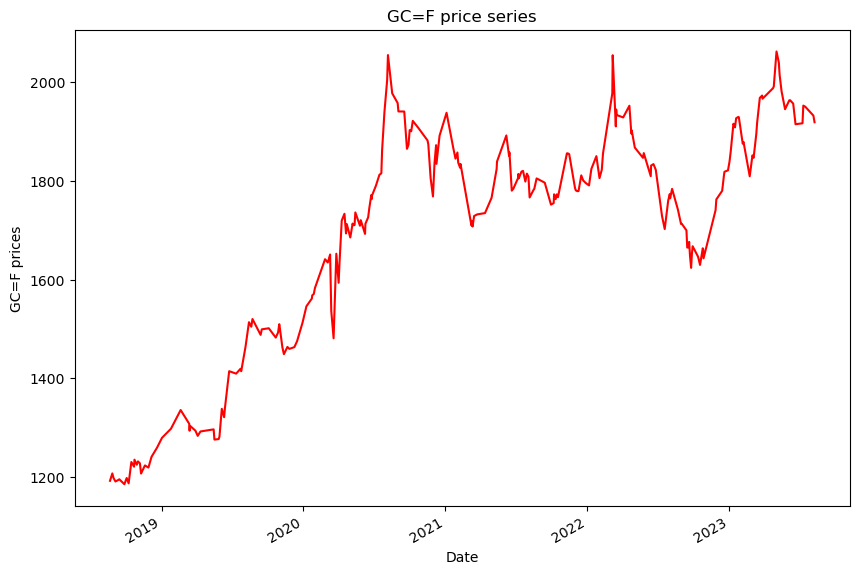

34.78682675998061


In [53]:
#model 1

x_test['Close']=r
print(x_test)
x_test.Close.plot(figsize=(10,7),color='r')
plt.ylabel("{} prices".format(stocks))
plt.title("{} price series".format(stocks))
plt.show()


print(mean_squared_error(y_test,r))

x_test=x_test.drop('Close',axis=1)
        
              

        
 
        

                   Open         High          Low  Volume        Close
Date                                                                  
2018-08-27  1210.300049  1211.400024  1205.199951     154  1207.255235
2020-08-06  2045.500000  2063.000000  2040.000000     294  2031.583300
2018-11-01  1215.400024  1236.000000  1215.400024      14  1225.066860
2022-07-20  1707.099976  1708.500000  1699.500000     130  1703.198624
2019-05-17  1280.000000  1280.000000  1274.500000       1  1277.646196
...                 ...          ...          ...     ...          ...
2023-01-06  1838.400024  1868.199951  1835.300049      26  1849.119413
2018-10-03  1202.599976  1202.599976  1196.599976      76  1199.910689
2020-04-03  1624.500000  1636.000000  1619.800049     643  1630.139138
2018-11-19  1223.099976  1223.099976  1223.099976       0  1222.782012
2021-08-06  1799.800049  1800.099976  1758.400024     859  1768.779922

[252 rows x 5 columns]


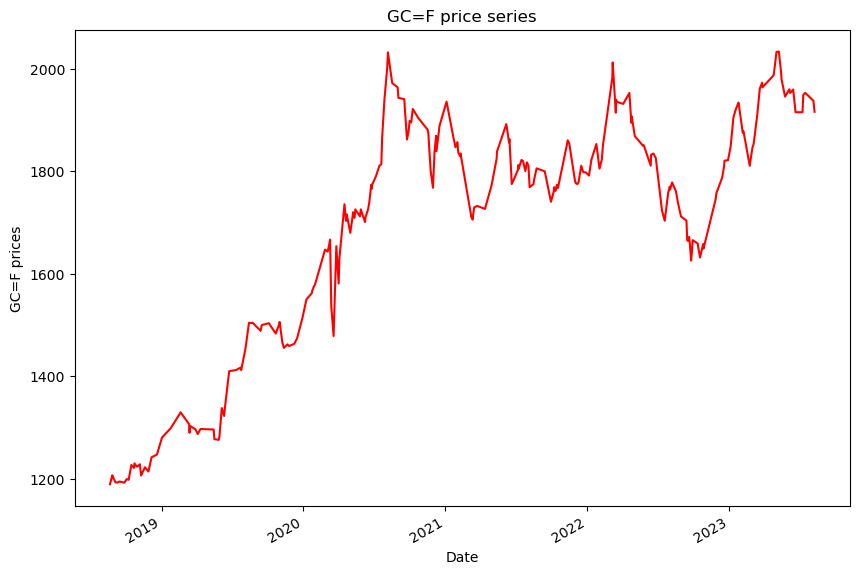

66.35377810654664


In [52]:
#model 2

x_test['Close']=r2
print(x_test)
x_test.Close.plot(figsize=(10,7),color='r')
plt.ylabel("{} prices".format(stocks))
plt.title("{} price series".format(stocks))
plt.show()


print(mean_squared_error(y_test,r2))

x_test=x_test.drop('Close',axis=1)

                   Open         High          Low  Volume        Close
Date                                                                  
2018-08-27  1210.300049  1211.400024  1205.199951     154  1207.400024
2020-08-06  2045.500000  2063.000000  2040.000000     294  2041.300049
2018-11-01  1215.400024  1236.000000  1215.400024      14  1219.000000
2022-07-20  1707.099976  1708.500000  1699.500000     130  1706.900024
2019-05-17  1280.000000  1280.000000  1274.500000       1  1276.099976
...                 ...          ...          ...     ...          ...
2023-01-06  1838.400024  1868.199951  1835.300049      26  1871.500000
2018-10-03  1202.599976  1202.599976  1196.599976      76  1202.000000
2020-04-03  1624.500000  1636.000000  1619.800049     643  1630.800049
2018-11-19  1223.099976  1223.099976  1223.099976       0  1222.900024
2021-08-06  1799.800049  1800.099976  1758.400024     859  1769.000000

[252 rows x 5 columns]


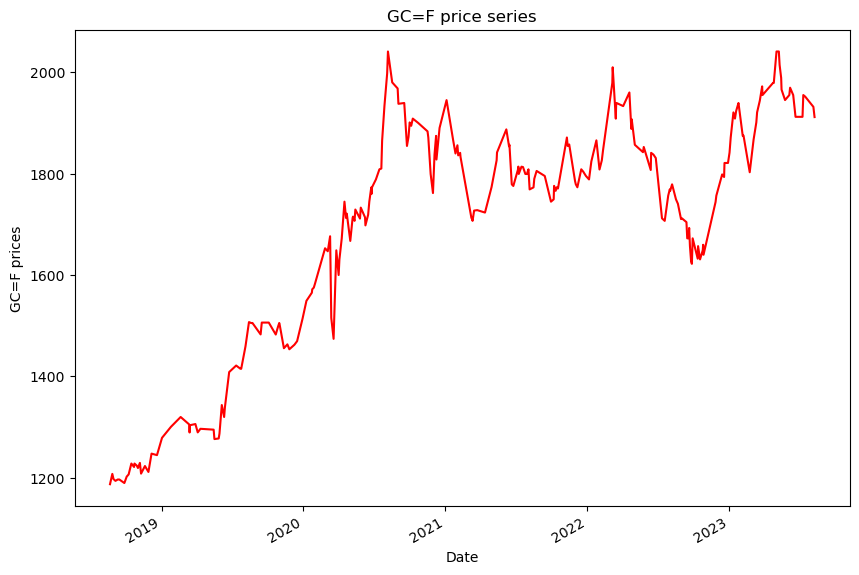

110.47566030582502


In [54]:
# model 3

x_test['Close']=r3
print(x_test)
x_test.Close.plot(figsize=(10,7),color='r')
plt.ylabel("{} prices".format(stocks))
plt.title("{} price series".format(stocks))
plt.show()


print(mean_squared_error(y_test,r3))

x_test=x_test.drop('Close',axis=1)

                   Open         High          Low  Volume        Close
Date                                                                  
2018-08-27  1210.300049  1211.400024  1205.199951     154  1209.801636
2020-08-06  2045.500000  2063.000000  2040.000000     294  2027.156250
2018-11-01  1215.400024  1236.000000  1215.400024      14  1228.228149
2022-07-20  1707.099976  1708.500000  1699.500000     130  1702.696411
2019-05-17  1280.000000  1280.000000  1274.500000       1  1277.097534
...                 ...          ...          ...     ...          ...
2023-01-06  1838.400024  1868.199951  1835.300049      26  1854.635742
2018-10-03  1202.599976  1202.599976  1196.599976      76  1198.694092
2020-04-03  1624.500000  1636.000000  1619.800049     643  1628.610229
2018-11-19  1223.099976  1223.099976  1223.099976       0  1224.003662
2021-08-06  1799.800049  1800.099976  1758.400024     859  1766.180542

[252 rows x 5 columns]


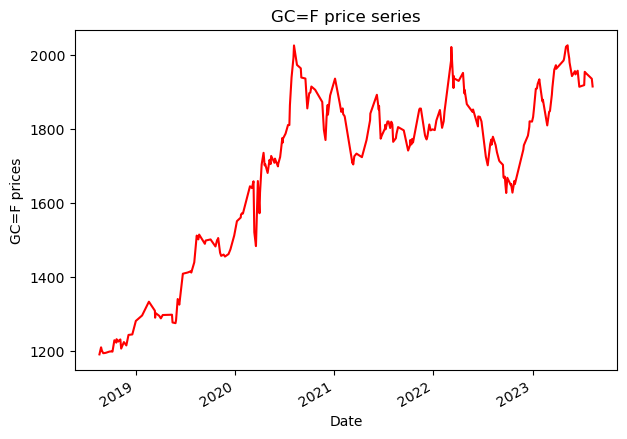

58.88613161675277


In [58]:
# model 4

x_test['Close']=r6
print(x_test)
x_test.Close.plot(figsize=(7,5),color='r')
plt.ylabel("{} prices".format(stocks))
plt.title("{} price series".format(stocks))
plt.show()


print(mean_squared_error(y_test,r6))

x_test=x_test.drop('Close',axis=1)


                   Open         High          Low  Volume        Close
Date                                                                  
2018-08-27  1210.300049  1211.400024  1205.199951     154  1207.607662
2020-08-06  2045.500000  2063.000000  2040.000000     294  2053.358741
2018-11-01  1215.400024  1236.000000  1215.400024      14  1229.694114
2022-07-20  1707.099976  1708.500000  1699.500000     130  1702.578680
2019-05-17  1280.000000  1280.000000  1274.500000       1  1276.214113
...                 ...          ...          ...     ...          ...
2023-01-06  1838.400024  1868.199951  1835.300049      26  1856.643639
2018-10-03  1202.599976  1202.599976  1196.599976      76  1198.566427
2020-04-03  1624.500000  1636.000000  1619.800049     643  1629.020295
2018-11-19  1223.099976  1223.099976  1223.099976       0  1222.864120
2021-08-06  1799.800049  1800.099976  1758.400024     859  1772.921766

[252 rows x 5 columns]


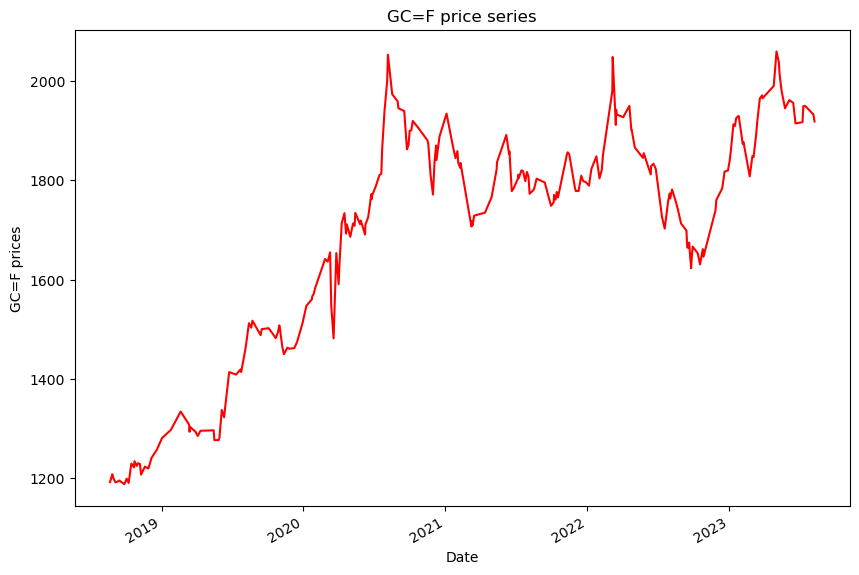

37.81202061683657


In [56]:
# model 5

x_test['Close']=r4
print(x_test)
x_test.Close.plot(figsize=(10,7),color='r')
plt.ylabel("{} prices".format(stocks))
plt.title("{} price series".format(stocks))
plt.show()


print(mean_squared_error(y_test,r4))

x_test=x_test.drop('Close',axis=1)

                   Open         High          Low  Volume        Close
Date                                                                  
2018-08-27  1210.300049  1211.400024  1205.199951     154  1207.264002
2020-08-06  2045.500000  2063.000000  2040.000000     294  2054.995456
2018-11-01  1215.400024  1236.000000  1215.400024      14  1231.569763
2022-07-20  1707.099976  1708.500000  1699.500000     130  1702.380394
2019-05-17  1280.000000  1280.000000  1274.500000       1  1275.808925
...                 ...          ...          ...     ...          ...
2023-01-06  1838.400024  1868.199951  1835.300049      26  1859.275005
2018-10-03  1202.599976  1202.599976  1196.599976      76  1197.973934
2020-04-03  1624.500000  1636.000000  1619.800049     643  1629.914988
2018-11-19  1223.099976  1223.099976  1223.099976       0  1223.425241
2021-08-06  1799.800049  1800.099976  1758.400024     859  1766.402481

[252 rows x 5 columns]


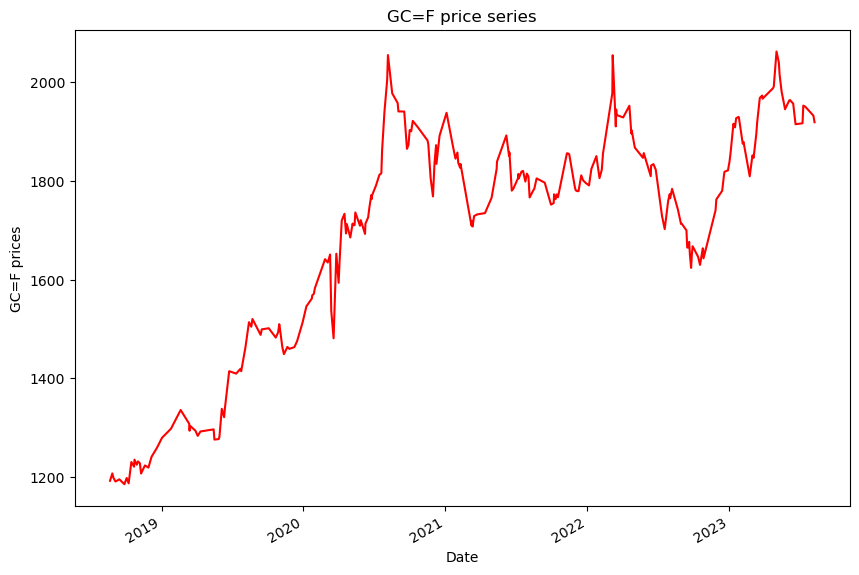

34.78676952206946


In [57]:
# model 6

x_test['Close']=r5
print(x_test)
x_test.Close.plot(figsize=(10,7),color='r')
plt.ylabel("{} prices".format(stocks))
plt.title("{} price series".format(stocks))
plt.show()


print(mean_squared_error(y_test,r5))

x_test=x_test.drop('Close',axis=1)

In [ ]:
#reality

x_test['Close']=y_test
print(x_test)
x_test.Close.plot(figsize=(10,7),color='r')
plt.ylabel("{} prices".format(stocks))
plt.title("{} price series".format(stocks))
plt.show()


print(mean_squared_error(y_test,r2))

x_test=x_test.drop('Close',axis=1)